In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import sineModel as SM
from smstools.models import harmonicModel as HM
from smstools.transformations import sineTransformations as ST
from smstools.transformations import harmonicTransformations as HT
from smstools.models import utilFunctions as UF

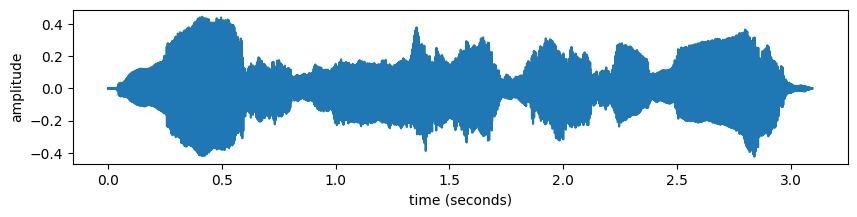

In [2]:
inputFile = "../sounds/vignesh.wav"
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

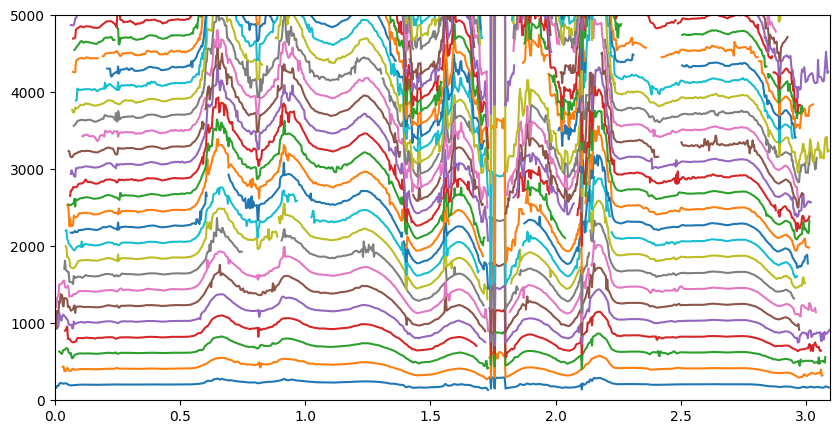

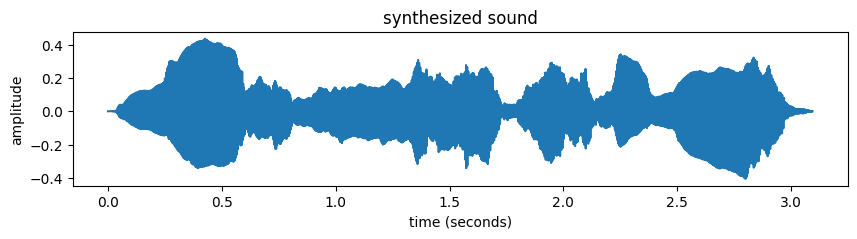

In [3]:
window="blackman"
M=1201
N=2048
t=-90
minSineDur=0.1
nH=100
minf0=130
maxf0=300
f0et=7
harmDevSlope=0.01

# size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128
# compute analysis window
w = get_window(window, M)
# compute the harmonic model of the whole sound
hfreq, hmag, hphase = HM.harmonicModelAnal(x, fs, w, N, H, t, nH, minf0, maxf0, f0et, harmDevSlope, minSineDur)

# synthesize the sines without original phases
y = SM.sineModelSynth(hfreq, hmag, np.array([]), Ns, H, fs)

# create figure to show plots
plt.figure(figsize=(10, 5))
# frequency range to plot
maxplotfreq = 5000.0
tracks = np.copy(hfreq)
numFrames = tracks.shape[0]
frmTime = H * np.arange(numFrames) / float(fs)
tracks[tracks <= 0] = np.nan
plt.plot(frmTime, tracks)
plt.axis([0, x.size / float(fs), 0, maxplotfreq])

# plot the output sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, y.size/fs, y.size)
plt.plot(time_indexes, y)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("synthesized sound")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))

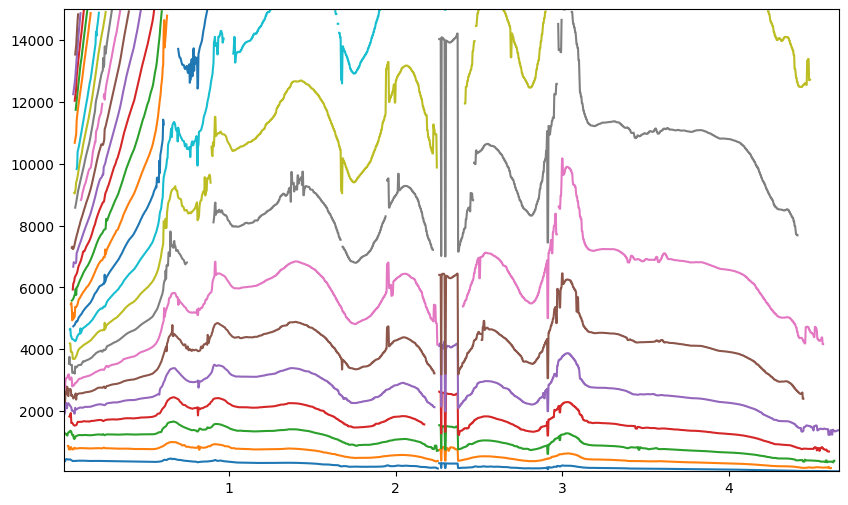

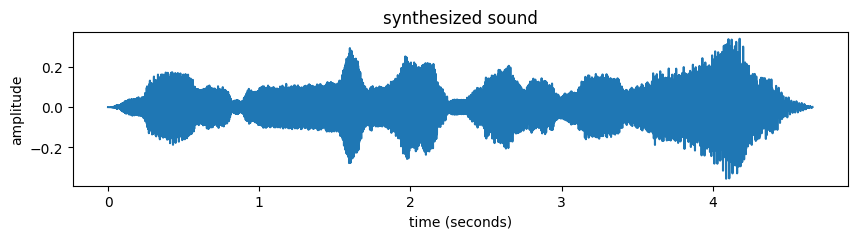

In [4]:
# transformation parameters
freqScaling=np.array([0, 2.0, 1, 0.3])
freqStretching=np.array([0, 1, 1, 1.5])
timbrePreservation=1
timeScaling=np.array([0, 0.0, 0.671, 0.671, 1.978, 1.978 + 1.0])


# size of fft used in synthesis
Ns = 512
# hop size (has to be 1/4 of Ns)
H = 128

# frequency scaling of the harmonics
yhfreq, yhmag = HT.harmonicFreqScaling(hfreq, hmag, freqScaling, freqStretching, timbrePreservation, fs)
# time scale the sound
yhfreq, yhmag = ST.sineTimeScaling(yhfreq, yhmag, timeScaling)
# synthesis
y = SM.sineModelSynth(yhfreq, yhmag, np.array([]), Ns, H, fs)


# create figure to plot
plt.figure(figsize=(10, 6))
# frequency range to plot
maxplotfreq = 15000.0

# plot the transformed sinusoidal frequencies
tracks = np.copy(yhfreq)
tracks = tracks * np.less(tracks, maxplotfreq)
tracks[tracks <= 0] = np.nan
numFrames = int(tracks[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
plt.plot(frmTime, tracks)
plt.autoscale(tight=True)

# plot the output sound
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, y.size/fs, y.size)
plt.plot(time_indexes, y)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title("synthesized sound")
plt.show()
ipd.display(ipd.Audio(data=y, rate=fs))